# 1.  確率の基礎とコピュラの概要

## **図1.4**  2変量正規分布の等高線

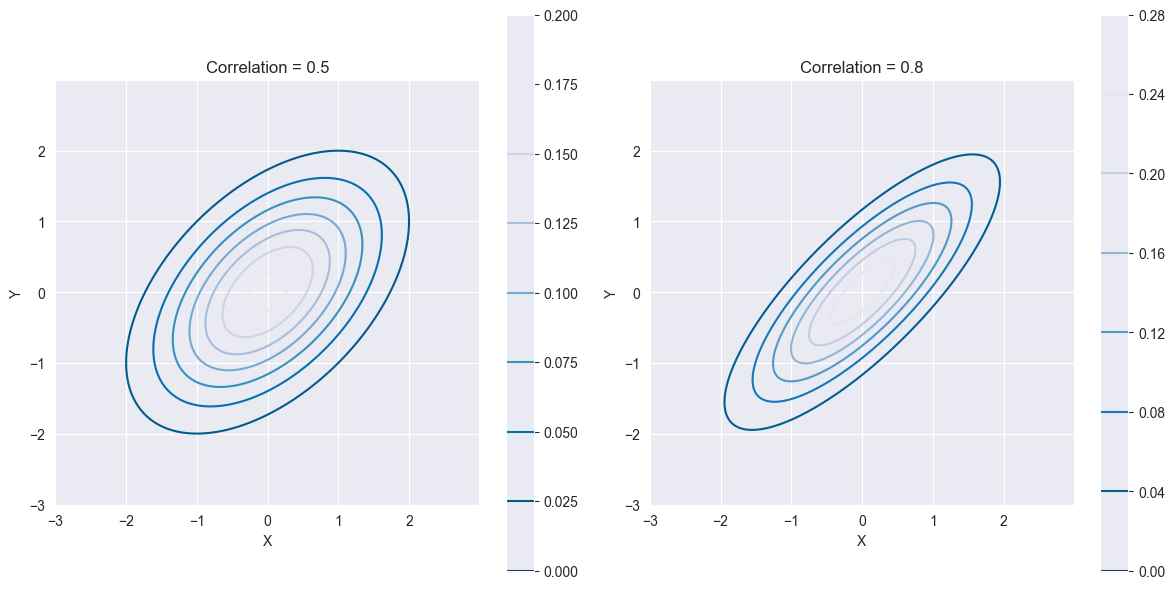

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import seaborn as sns
sns.set_style("darkgrid")

# パラメータの設定
mu = np.array([0, 0])  # 平均ベクトル
sigma1 = np.array([[1, 0.5], [0.5, 1]])  # 相関係数0.5の共分散行列
sigma2 = np.array([[1, 0.8], [0.8, 1]])  # 相関係数0.8の共分散行列

# 2変量正規分布の確率密度関数を計算するためのグリッド
x, y = np.mgrid[-3:3:.01, -3:3:.01]
pos = np.dstack((x, y))

# 確率密度関数の計算
rv1 = multivariate_normal(mu, sigma1)
rv2 = multivariate_normal(mu, sigma2)

pdf1 = rv1.pdf(pos)
pdf2 = rv2.pdf(pos)

# 描画
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 左側のプロット (相関係数0.5)
contour1 = axes[0].contour(x, y, pdf1, cmap='PuBu_r')
fig.colorbar(contour1, ax=axes[0])
axes[0].set_title("Correlation = 0.5")
axes[0].set_xlabel("X")
axes[0].set_ylabel("Y")
axes[0].set_aspect('equal', adjustable='box') # アスペクト比を等しくする

# 右側のプロット (相関係数0.8)
contour2 = axes[1].contour(x, y, pdf2, cmap='PuBu_r')
fig.colorbar(contour2, ax=axes[1])
axes[1].set_title("Correlation = 0.8")
axes[1].set_xlabel("X")
axes[1].set_ylabel("Y")
axes[1].set_aspect('equal', adjustable='box') # アスペクト比を等しくする

plt.tight_layout()
plt.show()


### **図1.5**  一様変換後の2変量正規分布の等高線

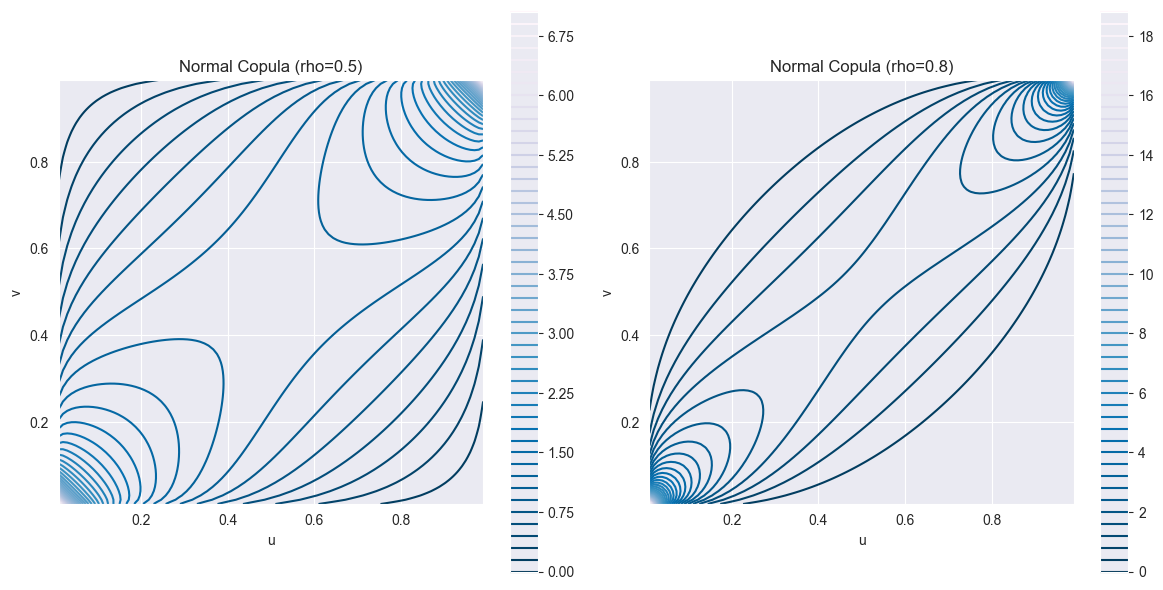

In [2]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

# 正規コピュラの確率密度関数
def normal_copula_pdf(u, v, rho):
  # 逆CDFを計算
  x = norm.ppf(u)
  y = norm.ppf(v)
  # 共分散行列の逆行列
  cov_inv = np.linalg.inv([[1, rho], [rho, 1]])
  # 確率密度関数を計算
  return 1 / (2 * np.pi * np.sqrt(1 - rho**2)) * np.exp(-0.5 * (cov_inv[0, 0] * x**2 + (cov_inv[0, 1] + cov_inv[1, 0]) * x * y + cov_inv[1, 1] * y**2)) / (norm.pdf(x) * norm.pdf(y))

# データの生成
u = np.linspace(0.01, 0.99, 100) # 境界を除く
v = np.linspace(0.01, 0.99, 100) # 境界を除く
U, V = np.meshgrid(u, v)

# ピアソン相関係数の設定
rho1 = 0.5
rho2 = 0.8

# グラフの作成
fig_contour_normal = plt.figure(figsize=(12, 6))

ax1_normal = fig_contour_normal.add_subplot(1, 2, 1)
contour_normal_1 = ax1_normal.contour(U, V, normal_copula_pdf(U, V, rho1), levels=50, cmap='PuBu_r')
fig_contour_normal.colorbar(contour_normal_1, ax=ax1_normal)
ax1_normal.set_xlabel('u')
ax1_normal.set_ylabel('v')
ax1_normal.set_title(f'Normal Copula (rho={rho1})')
ax1_normal.set_aspect('equal', adjustable='box')

ax2_normal = fig_contour_normal.add_subplot(1, 2, 2)
contour_normal_2 = ax2_normal.contour(U, V, normal_copula_pdf(U, V, rho2), levels=50, cmap='PuBu_r')
fig_contour_normal.colorbar(contour_normal_2, ax=ax2_normal)
ax2_normal.set_xlabel('u')
ax2_normal.set_ylabel('v')
ax2_normal.set_title(f'Normal Copula (rho={rho2})')
ax2_normal.set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.show()

### **図1.6**  クレイトンコピュラ密度の等高線

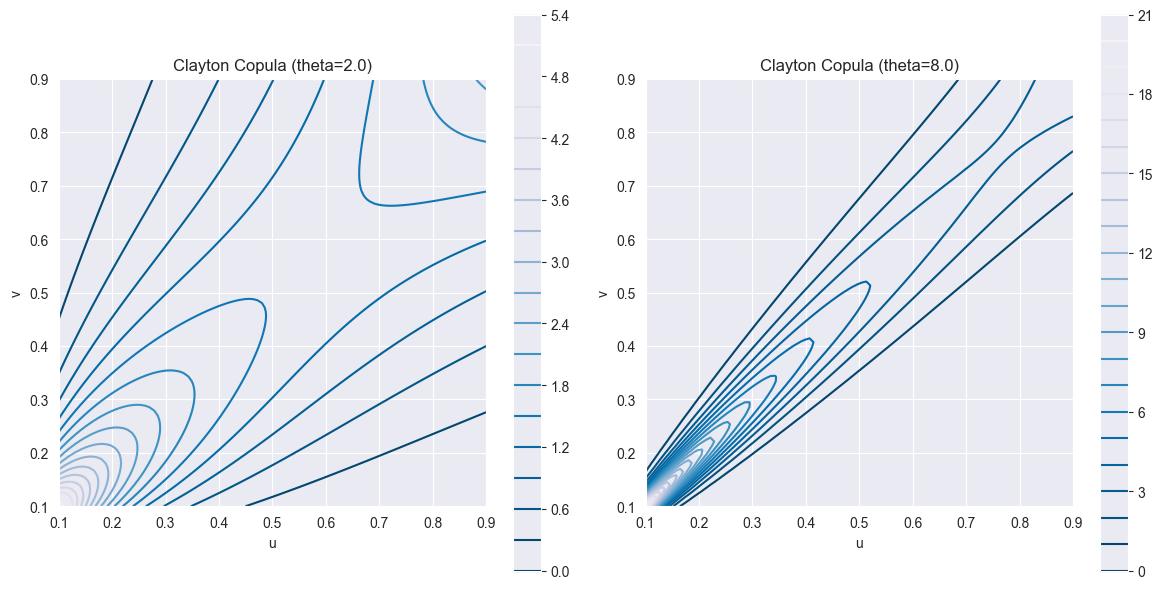

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")

# クレイトンコピュラの密度関数
def Clayton_copula_pdf(u, v, theta=1.0):
  return (theta + 1) * u**(-theta-1) * v**(-theta-1) * (u**(-theta) + v**(-theta) - 1)**(-2 - 1/theta)

# データの生成
u = np.linspace(0.1, 0.9, 100) # 0と1を含めるとエラーになる場合があるため範囲を調整
v = np.linspace(0.1, 0.9, 100) # 0と1を含めるとエラーになる場合があるため範囲を調整
U, V = np.meshgrid(u, v)

# グラフの作成
fig_contour = plt.figure(figsize=(12, 6))

ax1 = fig_contour.add_subplot(1, 2, 1)
contour_lower = ax1.contour(U, V, Clayton_copula_pdf(U, V, 2), levels=20, cmap='PuBu_r')
fig_contour.colorbar(contour_lower, ax=ax1)
ax1.set_xlabel('u')
ax1.set_ylabel('v')
ax1.set_title('Clayton Copula (theta=2.0)')
ax1.set_aspect('equal', adjustable='box')

ax2 = fig_contour.add_subplot(1, 2, 2)
contour_upper = ax2.contour(U, V, Clayton_copula_pdf(U, V, 8), levels=20, cmap='PuBu_r')
fig_contour.colorbar(contour_upper, ax=ax2)
ax2.set_xlabel('u')
ax2.set_ylabel('v')
ax2.set_title('Clayton Copula (theta=8.0)')
ax2.set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.show()